In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def plot_3d(x, y, y_pred=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
    if y_pred is not None:
        ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
    plt.legend()

In [3]:
def linear_fn(x):
    # Underlying function.
    return (x[0] * 1.7) + (x[1] * -.9) + 33.5    
#     return (x[0] * 1.7) + 33.5

In [36]:
X = np.random.randn(1000, 2)

X.shape

(1000, 2)

In [37]:
y_true = np.array([linear_fn(x) for x in X]).reshape(-1, 1)

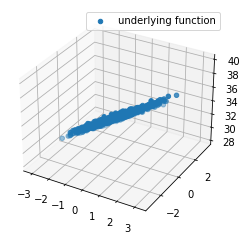

In [38]:
if X.shape[1] > 1:
    plot_3d(X, y_true)
else:
    plt.scatter(X, y_true)

In [39]:
class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_pred - y_true)**2).mean()
    
    def backward(self):
#         n = self.y_true.shape[0]
        n = 1
        self.gradient = 2 * (self.y_pred - self.y_true) / n
        return self.gradient

In [40]:
class Linear:
    def __init__(self, input_dim, output_dim, verbose=True):
        self.weights = np.random.uniform(-1, 1, (input_dim, output_dim))
        self.bias = np.zeros(output_dim)
        if verbose:
            print(f"W init: {self.weights}")            
            print(f"b init: {self.bias}")
            
    def __call__(self, x):
        self.x = x
        return x @ self.weights + self.bias
    
    def backward(self, gradient):
        self.weights_gradient = self.x.T @ gradient
        self.bias_gradient = gradient
        self.x_gradient = gradient @ self.weights.T
        return self.x_gradient
        
    def update(self, lr):
        self.weights = self.weights - lr * self.weights_gradient
        self.bias = self.bias - lr * self.bias_gradient

In [41]:
lm = Linear(X.shape[1], 1)
loss = MSE()

W init: [[-0.66544605]
 [-0.80462088]]
b init: [0.]


In [42]:
def train(model, loss, X, y_true, lr, epochs=10, verbose=False):
    for i in range(epochs):
        for i, x in enumerate(X):
            x = x.reshape(1, -1)
            yp = model(x)
            if verbose:
                print(f"Pred: {yp}")

            l = loss(yp, y_true[i])
            if verbose:
                print(f"Loss: {l}")

            gradient = loss.backward()
            model.backward(gradient)
            model.update(lr)
    return model, loss


def plot(X, y_true, y_preds=None):
    if X.shape[1] > 1:
        plot_3d(X, y_true, y_preds)
    else:
        plt.scatter(X, y_true)
        if y_preds is not None:
            plt.scatter(X, y_preds)

W init: [[-0.56438431]
 [-0.33655696]]
b init: [0.]


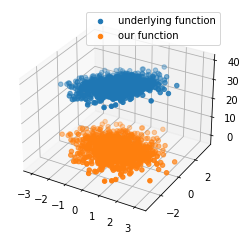

In [43]:
lm = Linear(X.shape[1], 1)
loss = MSE()

init_y_preds = lm(X)

plot(X, y_true, init_y_preds)

In [44]:
lm, loss = train(lm, loss, X, y_true, lr=.01, epochs=10, verbose=False)

print(f"W trained: {lm.weights}")
print(f"b trained: {lm.bias}")

W trained: [[ 1.7]
 [-0.9]]
b trained: [[33.5]]


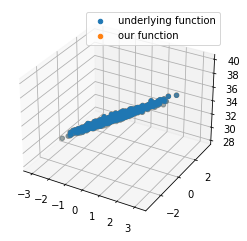

In [45]:
y_preds = lm(X)

plot(X, y_true, y_preds)

In [46]:
loss(y_preds, y_true)

8.728891066677056e-27

# Learn a non-linear fn

In [47]:
def nonlinear_fn(x):
    # Underlying function.
    return (x[0] ** 3) + (x[1] * .3) - 3.5    

In [48]:
X[0]

array([-2.20426978, -0.81097004])

In [49]:
np.cos(np.abs(X[0][1]) ** 4.3)

0.9186360178993093

In [50]:
y_true = np.array([nonlinear_fn(x) for x in X]).reshape(-1, 1)
y_true

array([[-14.45340859],
       [ -2.96368249],
       [ -3.6574712 ],
       [  4.51819448],
       [ -3.54807146],
       [ -4.99859436],
       [ -3.4834301 ],
       [ -3.6912828 ],
       [ -3.38715951],
       [ -3.89629308],
       [ -2.50226675],
       [ -3.45470074],
       [ -2.96197335],
       [ -3.59435535],
       [  4.89696645],
       [ -4.68244137],
       [ -3.5383518 ],
       [ -3.69631477],
       [ -3.39629853],
       [ -3.57761012],
       [ -3.77479417],
       [ -7.87600806],
       [ -3.68523641],
       [ -3.81748035],
       [ -3.26518098],
       [ -3.59558649],
       [  5.64954953],
       [ -3.6570312 ],
       [ -3.81816902],
       [ -3.62235511],
       [ -3.36210382],
       [ -0.14779139],
       [ -3.56023923],
       [  0.38069086],
       [ -3.65182795],
       [ -3.23453504],
       [ -4.468961  ],
       [ -3.89802843],
       [ -3.09953547],
       [ -4.28175694],
       [ -3.90046737],
       [ -3.09737775],
       [ -6.74873564],
       [ -3

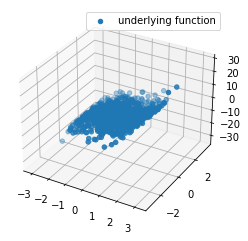

In [51]:
if X.shape[1] > 1:
    plot_3d(X, y_true)
else:
    plt.scatter(X, y_true)

W init: [[-0.47928086]
 [-0.11658936]]
b init: [0.]


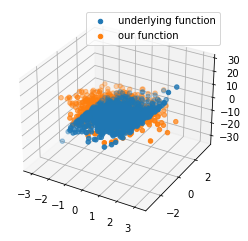

In [52]:
lm = Linear(X.shape[1], 1)
loss = MSE()

init_y_preds = lm(X)

plot(X, y_true, init_y_preds)



In [53]:
lm, loss = train(lm, loss, X, y_true, lr=.01, epochs=10, verbose=False)

print(f"W trained: {lm.weights}")
print(f"b trained: {lm.bias}")

W trained: [[2.42251108]
 [0.20520216]]
b trained: [[-3.44572626]]


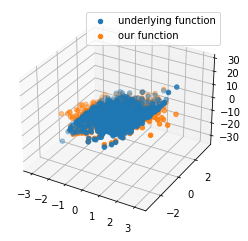

In [54]:
y_preds = lm(X)

plot(X, y_true, y_preds)

In [55]:
loss(y_preds, y_true)

4.905344448672341

## Add a ReLu

In [76]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
        self.input_gradient = (self.input_ > 0) * output_gradient
        return self.input_gradient

In [77]:
class Model:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.linear1 = Linear(input_dim, hidden_dim)
        self.relu = Relu()
        self.linear2 = Linear(hidden_dim, output_dim)
        
    def __call__(self, x):
        h = self.linear1(x)
        z = self.relu(h)
        y_pred = self.linear2(z)
        return y_pred
    
    def backward(self, gradient):
        self.linear2_gradient = self.linear2.backward(gradient) 
        self.relu_gradient = self.relu.backward(self.linear2_gradient)
        self.linear1_gradient = self.linear1.backward(self.relu_gradient)
        
    def update(self, lr):
        self.linear2.update(lr)
        self.linear1.update(lr)
        

In [84]:
nn = Model(X.shape[1], 64, 1)
loss = MSE()

W init: [[ 0.06679684  0.42587434 -0.31764284  0.73406029  0.50003143 -0.90524778
  -0.37988627 -0.30161611  0.61718389 -0.67170486  0.57627407 -0.31058469
   0.77529136 -0.58007321 -0.58911476  0.20567755  0.1439036  -0.15985645
  -0.50135265  0.28309208 -0.64105733  0.37491842  0.30867552  0.19946138
   0.97024572 -0.45786135 -0.883597    0.0640343   0.89868945 -0.23627421
  -0.97888291  0.7640796   0.21291634  0.36400163  0.18730543  0.3579771
   0.76589778 -0.89178062  0.20236267  0.3070449  -0.36662077  0.95100511
   0.49045526  0.2555838  -0.97884708  0.31332022 -0.1446357  -0.07770334
  -0.6867071   0.89448261  0.00758505 -0.20306395  0.05059923  0.39656634
   0.67028721 -0.98911375 -0.73979551 -0.87511558  0.33282626  0.39501979
   0.76272964  0.78067454 -0.36502425 -0.27359454]
 [-0.48202187 -0.02404005 -0.46565256 -0.37412194  0.24057189  0.7806811
  -0.32753513  0.85209981 -0.6581494   0.14051776  0.56009729 -0.31670255
   0.55350218 -0.15281693 -0.88379339 -0.69969748  0.21

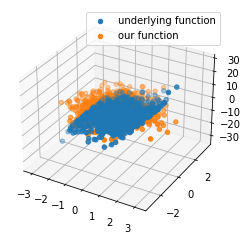

In [85]:
init_y_preds = nn(X)

plot(X, y_true, init_y_preds)

In [86]:
loss(init_y_preds, y_true)

25.470334011724482

In [90]:
nn, loss = train(nn, loss, X, y_true, lr=.001, epochs=100, verbose=False)

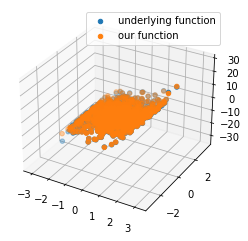

In [91]:
y_preds = nn(X)

plot(X, y_true, y_preds)

In [92]:
loss(y_preds, y_true)

0.17906154836881866

In [72]:
nn.linear1.weights

array([[ 2.99009905,  1.90686252, -5.23442863, -0.73597617,  0.25851368,
         0.53337703,  0.14569456,  0.90660837,  1.50710657, -1.20264746,
         1.75379269,  3.2697516 ,  1.01206025, -1.8183398 ,  1.08702729,
         0.03284197],
       [-0.15295918,  0.12839499,  0.125489  ,  1.11088904,  0.00615342,
         0.12535066,  1.0807773 ,  0.25285575,  0.18104812,  1.10014833,
         0.13130254,  0.36352858,  0.06042829,  1.59726961,  0.12436028,
         0.33684196]])

In [73]:
nn.linear1.bias

array([[-3.55536838, -3.38753593, -7.42430794, -2.16970983, -0.44091875,
        -2.42318699, -2.03410068,  2.26174662, -2.45445799, -3.74648362,
        -2.80373497, -5.53992039, -1.71793984, -4.98386805, -1.68292353,
        -0.61848863]])

In [74]:
nn.linear2.weights

array([[ 2.19345018],
       [ 1.33332448],
       [-2.06160188],
       [ 0.54910353],
       [ 0.17755722],
       [ 0.85920392],
       [-0.44060233],
       [ 1.02825085],
       [ 1.0142373 ],
       [ 0.6842059 ],
       [ 1.17284188],
       [ 2.09268122],
       [ 0.7879374 ],
       [ 0.91651557],
       [ 0.69714842],
       [-0.13831256]])

In [75]:
nn.linear2.bias

array([[-5.78236342]])